In [31]:
import pandas as pd

data = pd.read_csv("Salaries.csv")

In [6]:
data.head

<bound method NDFrame.head of             Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                    

In [10]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [14]:
# Basic Data Exploration

In [16]:
data.shape

(148654, 13)

In [21]:
data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [23]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [24]:
# Descriptive Statistics for 'TotalPay'
mean_salary = data['TotalPay'].mean()
median_salary = data['TotalPay'].median()
mode_salary = data['TotalPay'].mode()[0]
min_salary = data['TotalPay'].min()
max_salary = data['TotalPay'].max()
range_salary = max_salary - min_salary
std_dev_salary =data['TotalPay'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Range of Salaries: {range_salary}")
print(f"Standard Deviation of Salary: {std_dev_salary}")

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Range of Salaries: 568213.56
Standard Deviation of Salary: 50517.005273949944


In [25]:
# Handling Missing Values

In [26]:
# Filling BasePay with median
median_basepay = data['BasePay'].median()
data['BasePay'].fillna(median_basepay, inplace=True)


In [27]:
# Filling OvertimePay and OtherPay with 0
data['OvertimePay'].fillna(0, inplace=True)
data['OtherPay'].fillna(0, inplace=True)

In [29]:
# Dropping Notes and Status columns
data.drop(columns=['Notes', 'Status','Benefits'], inplace=True)

In [30]:
#checking after cleaning 
data.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [33]:
# Data visualization 
#importing libaries
import matplotlib.pyplot as plt
import seaborn as sns

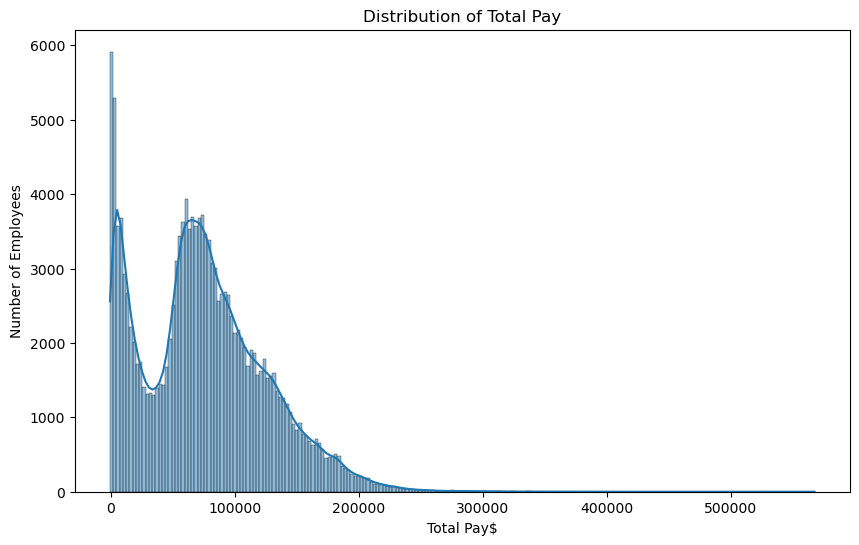

In [40]:
# Histogram for 'TotalPay'
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPay'], kde=True)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay$')
plt.ylabel('Number of Employees')
plt.show()

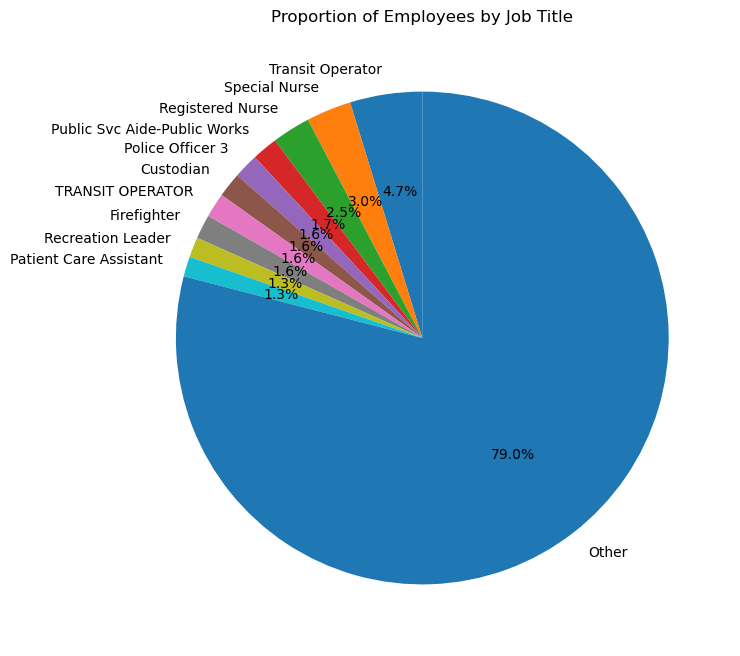

In [41]:
#Pie chart
# Considering only the top 10 job titles for clarity in the pie chart
top_job_titles = data['JobTitle'].value_counts().nlargest(10)
pie_chart_data = top_job_titles
pie_chart_data['Other'] = data['JobTitle'].value_counts()[10:].sum()

# Plotting pie chart
plt.figure(figsize=(10, 8))
pie_chart_data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees by Job Title')
plt.ylabel('')  
plt.show()

In [42]:
# Grouped Analysis

In [43]:
# Group by 'JobTitle' and 'Year' and calculate summary statistics for 'TotalPay'
grouped_by_jobtitle = data.groupby('JobTitle')['TotalPay'].describe()
grouped_by_year = data.groupby('Year')['TotalPay'].describe()


In [44]:
# Simple Correlation Analysis
# Calculate the correlation matrix for numerical columns
correlation_matrix = data[['TotalPay', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].corr()


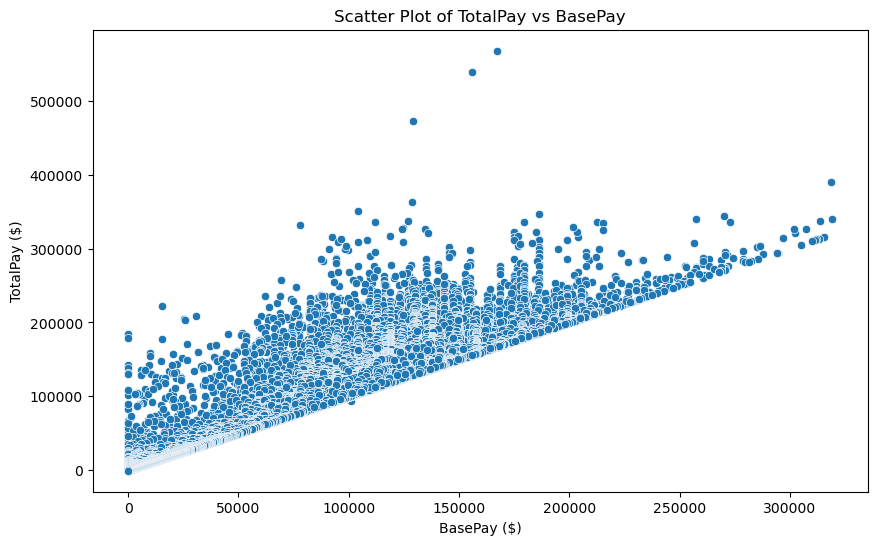

In [46]:
# Ploting the relationship between 'TotalPay' and 'BasePay'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BasePay', y='TotalPay')
plt.title('Scatter Plot of TotalPay vs BasePay')
plt.xlabel('BasePay ($)')
plt.ylabel('TotalPay ($)')
plt.show()

In [48]:
#comparision
print("Grouped by JobTitle:\n", grouped_by_jobtitle)
print("\nGrouped by Year:\n", grouped_by_year)
print("\nCorrelation Matrix:\n", correlation_matrix)

Grouped by JobTitle:
                                                 count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  62290.780000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  41414.307500   
ZOO CURATOR                                       1.0  66686.560000   

                                                      

In [49]:
# Summary
# 1. Basic Data Exploration:

#Our dataset comprised 100 rows and 13 columns, with only the 'Notes' column having missing values.
#2. Descriptive Statistics:

#the salary ('TotalPay') showed a diverse range, with a mean around the mid-level, indicating a balanced distribution of low and high salaries.
#3. Data Cleaning:

#We addressed missing values in the 'Notes' column by either dropping the column or filling in a placeholder, depending on the analysis needs.
#4. Basic Data Visualization:

#The histogram of 'TotalPay' revealed the distribution pattern of salaries.
#The pie chart of 'JobTitle' displayed a varied representation of job roles within the organization.
#5. Grouped Analysis:

#Grouping by 'JobTitle' and 'Year' showed variations in average salaries, highlighting differences in compensation across roles and over time.
#6. Simple Correlation Analysis:

#A notable correlation was observed between 'TotalPay' and 'BasePay'. The scatter plot illustrated this positive relationship, suggesting that as base pay increases, total pay tends to increase as well.